In [210]:
import numpy as np
import pandas as pd

In [211]:
from statistics import mean

In [212]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [213]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score

In [214]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [215]:
from sklearn.metrics import accuracy_score

In [216]:
from IPython.display import display, HTML

In [217]:
df = pd.read_csv('C:/Users/Dylan/Desktop/Datasets/car_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [219]:
df.shape

(301, 9)

In [220]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [221]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [222]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [223]:
df["Fuel_Type_Encode"] = np.nan
df["Seller_Type_Encode"] = np.nan
df["Transmission_Encode"] = np.nan

le = LabelEncoder()
df['Fuel_Type_Encode'] = le.fit_transform(df['Fuel_Type'])
df['Seller_Type_Encode'] = le.fit_transform(df['Seller_Type'])
df['Transmission_Encode'] = le.fit_transform(df['Transmission'])

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Fuel_Type_Encode,Seller_Type_Encode,Transmission_Encode
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,1,0,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2,0,1
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,1,0,1


In [224]:
df = df[['Car_Name', 'Year', 'Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Fuel_Type_Encode','Seller_Type','Seller_Type_Encode','Transmission','Transmission_Encode','Owner']]
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Fuel_Type_Encode,Seller_Type,Seller_Type_Encode,Transmission,Transmission_Encode,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,2,Dealer,0,Manual,1,0
1,sx4,2013,4.75,9.54,43000,Diesel,1,Dealer,0,Manual,1,0
2,ciaz,2017,7.25,9.85,6900,Petrol,2,Dealer,0,Manual,1,0
3,wagon r,2011,2.85,4.15,5200,Petrol,2,Dealer,0,Manual,1,0
4,swift,2014,4.60,6.87,42450,Diesel,1,Dealer,0,Manual,1,0


In [225]:
df = df.drop(['Car_Name', 'Fuel_Type','Seller_Type','Transmission'], axis=1)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_Encode,Seller_Type_Encode,Transmission_Encode,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 301 non-null    int64  
 1   Selling_Price        301 non-null    float64
 2   Present_Price        301 non-null    float64
 3   Kms_Driven           301 non-null    int64  
 4   Fuel_Type_Encode     301 non-null    int32  
 5   Seller_Type_Encode   301 non-null    int32  
 6   Transmission_Encode  301 non-null    int32  
 7   Owner                301 non-null    int64  
dtypes: float64(2), int32(3), int64(3)
memory usage: 15.4 KB


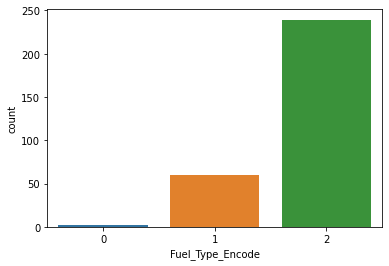

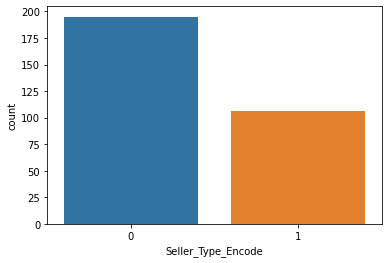

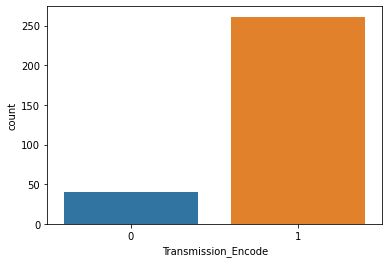

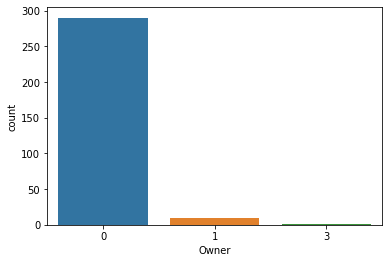

In [227]:
distinct_values = ['Fuel_Type_Encode','Seller_Type_Encode','Transmission_Encode','Owner']
for col in distinct_values:
    sns.countplot(data=df, x=col)
    plt.show()

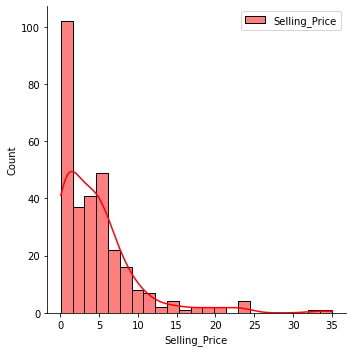

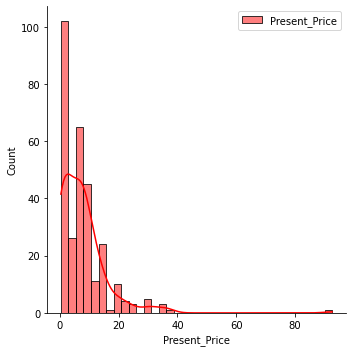

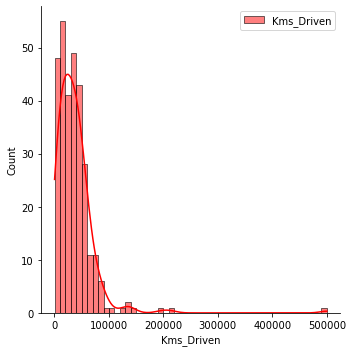

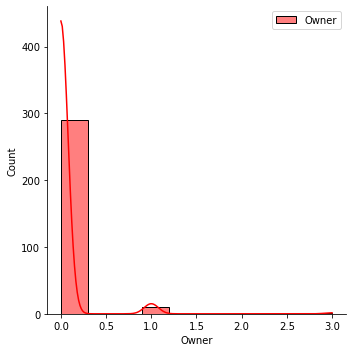

In [228]:
continous_values  = ['Selling_Price','Present_Price','Kms_Driven','Owner']
for col in continous_values:
    sns.displot(df[col], color='red', label=col, kde=True)
    plt.legend()

In [229]:
df = df.drop(['Year'],axis=1)
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_Encode,Seller_Type_Encode,Transmission_Encode,Owner
Selling_Price,1.000000,0.878983,0.029187,-0.509467,-0.550724,-0.367128,-0.088344
Present_Price,0.878983,1.000000,0.203647,-0.440415,-0.512030,-0.348715,0.008057
Kms_Driven,0.029187,0.203647,1.000000,-0.166801,-0.101419,-0.162510,0.089216
Fuel_Type_Encode,-0.509467,-0.440415,-0.166801,1.000000,0.352415,0.080466,0.055705
Seller_Type_Encode,-0.550724,-0.512030,-0.101419,0.352415,1.000000,0.063240,0.124269
Transmission_Encode,-0.367128,-0.348715,-0.162510,0.080466,0.063240,1.000000,-0.050316
Owner,-0.088344,0.008057,0.089216,0.055705,0.124269,-0.050316,1.000000


<AxesSubplot:>

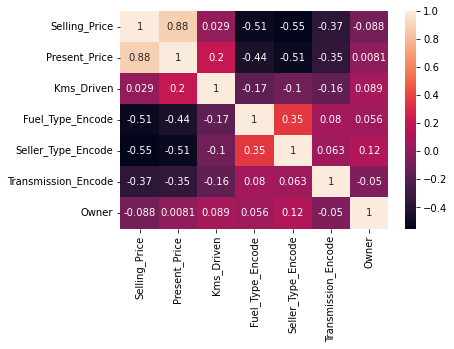

In [230]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='Selling_Price', ylabel='Present_Price'>

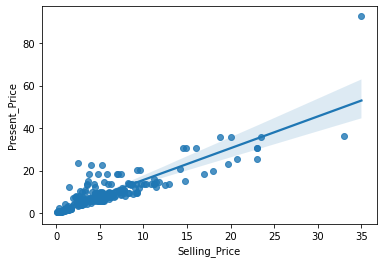

In [231]:
sns.regplot(x='Selling_Price',y='Present_Price',data=df)

<AxesSubplot:xlabel='Kms_Driven', ylabel='Present_Price'>

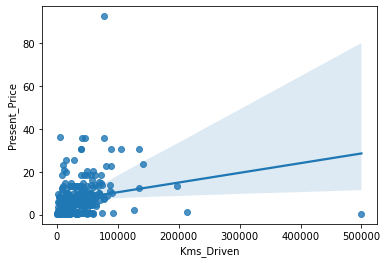

In [232]:
sns.regplot(x='Kms_Driven',y='Present_Price',data=df)

<AxesSubplot:xlabel='Owner', ylabel='Present_Price'>

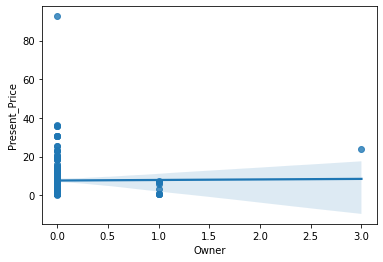

In [233]:
sns.regplot(x='Owner',y='Present_Price',data=df)

In [234]:
X = df[['Selling_Price','Kms_Driven','Owner']]
X.head()

,Selling_Price,Kms_Driven,Owner
0,3.35,27000,0
1,4.75,43000,0
2,7.25,6900,0
3,2.85,5200,0
4,4.60,42450,0


In [235]:
y = df[['Present_Price']]
y.head()

,Present_Price
0,5.59
1,9.54
2,9.85
3,4.15
4,6.87


In [236]:
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25
    )

In [237]:
lr = LinearRegression().fit(X_train,y_train)
prediction = lr.predict(X_test)

training_score = lr.score(X_train,y_train)
test_score = lr.score(X_test,y_test)

display(HTML("<h1>Linear Regression</h1>"))
print('----------------------------------------------------------------')
print('Accuracy Training Score: ', training_score)
print('Accuracy Test Score: ', test_score)
print('----------------------------------------------------------------')


----------------------------------------------------------------
Accuracy Training Score:  0.8040185587790437
Accuracy Test Score:  0.7973065330000525
----------------------------------------------------------------


In [238]:
# List to maintain the different cross-validation scores
cross_val_scores_ridge = []

# List to maintain the different values of alpha
alpha = []

# Loop to compute the different values of cross-validation scores
for i in range(1, 9):
	ridgeModel = Ridge(alpha = i * 0.25)
	ridgeModel.fit(X_train, y_train)
	scores = cross_val_score(ridgeModel, X, y, cv = 10)
	avg_cross_val_score = mean(scores)*100
	cross_val_scores_ridge.append(avg_cross_val_score)
	alpha.append(i * 0.25)

# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
	print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))


0.25 : -643.3842626977188
0.5 : -642.1537762661931
0.75 : -640.9657417324039
1.0 : -639.8199301701769
1.25 : -638.7161139171186
1.5 : -637.6540665667537
1.75 : -636.6335629607266
2.0 : -635.6543791810526
